In [ ]:
# common
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('/content/car_price.csv')
df.head(10)


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
5,5,Volkswagen Vento 1.2 TSI Highline AT,7.66 Lakh,"49,719 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats
6,6,Volkswagen Vento 1.2 TSI Highline Plus AT,7.58 Lakh,"43,688 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats
7,7,Honda WR-V VX Diesel,11.60 Lakh,"14,470 kms",Diesel,Manual,1st Owner,2021,1498 cc,5 Seats
8,8,Honda City i VTEC CVT SV,6.99 Lakh,"21,429 kms",Petrol,Automatic,1st Owner,2015,1497 cc,5 Seats
9,9,Renault Duster Petrol RXS CVT,7.53 Lakh,"31,750 kms",Petrol,Automatic,1st Owner,2017,1498 cc,5 Seats


Data Pre-Processing

In [ ]:
# shape the data frame
df.shape

(5512, 10)

In [ ]:
df.drop_duplicates()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [ ]:
df.shape

(5512, 10)

In [ ]:
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
# Drop missing values from affected columns
df = df.dropna()

In [ ]:
df.count()

Unnamed: 0             5512
car_name               5512
car_prices_in_rupee    5512
kms_driven             5512
fuel_type              5512
transmission           5512
ownership              5512
manufacture            5512
engine                 5512
Seats                  5512
dtype: int64

In [ ]:
# viewing the column name
df.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [ ]:
# datatypes of each column
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [ ]:
# check for null values
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [ ]:
# make a copy of a data frame
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
# remove unwanted column
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [ ]:
# renaming car_name as model
# creating a column as manufacturer
# only model name
df.rename(columns={'car_name': 'model'}, inplace=True)
df['manufacturer'] = df['model'].map(lambda x: str(x).strip().split(" ")[0])
df['model'] = df['model'].map(lambda x: str(x).strip().split(" ")[1])

In [ ]:
# changing kms driven to numeric
df['kms_driven'] = df['kms_driven'].map(lambda x: x.rstrip(' kms'))
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(',', ''))
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [ ]:
# changing engine into numeric
df['engine'] = df['engine'].map(lambda x: x.rstrip(' cc'))
df['engine'] = pd.to_numeric(df['engine'])

In [ ]:
# removing seats abbrevation
df['Seats'] = df['Seats'].map(lambda x: x.rstrip(' Seats'))

In [ ]:
df['manufacturer'].value_counts()

Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: manufacturer, dtype: int64

In [ ]:
# splitting car price as price and multiply
df[['price', 'multiply']] = df['car_prices_in_rupee'].str.split(' ', 1, expand=True)
df.drop('car_prices_in_rupee', axis=1, inplace=True)

<ipython-input-19-5845e24c0502>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['price', 'multiply']] = df['car_prices_in_rupee'].str.split(' ', 1, expand=True)


In [ ]:
# converting multiply column into numerical value
df['multiply']=df['multiply'].str.replace('Lakh','100000')
df['multiply']=df['multiply'].str.replace('Crore','10000000')
df['multiply'] = pd.to_numeric(df['multiply'])

In [ ]:
# getting price in actual numbers
df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'] * df['multiply']

In [ ]:
# remove the multiply column
df = df.drop(columns=["multiply"], axis=1)

In [ ]:
# rename the column names
df.rename(columns={'manufacture': 'year'}, inplace=True)

In [ ]:
# rearrange the data frame
df = df.iloc[:,[8,0,5,1,6,2,3,7,4,9]]

In [ ]:
df.columns

Index(['manufacturer', 'model', 'year', 'kms_driven', 'engine', 'fuel_type',
       'transmission', 'Seats', 'ownership', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  5512 non-null   object 
 1   model         5512 non-null   object 
 2   year          5512 non-null   int64  
 3   kms_driven    5512 non-null   int64  
 4   engine        5512 non-null   int64  
 5   fuel_type     5512 non-null   object 
 6   transmission  5512 non-null   object 
 7   Seats         5512 non-null   object 
 8   ownership     5512 non-null   object 
 9   price         5389 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [ ]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,Jeep,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,1003000.0
1,Renault,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,1283000.0
2,Toyota,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,1640000.0
3,Honda,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,777000.0
4,Volkswagen,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,515000.0


In [ ]:
# replace nan with zero and inf with finite numbers because input is too large for training
df['price'] = np.nan_to_num(df['price'])

Data Visualization

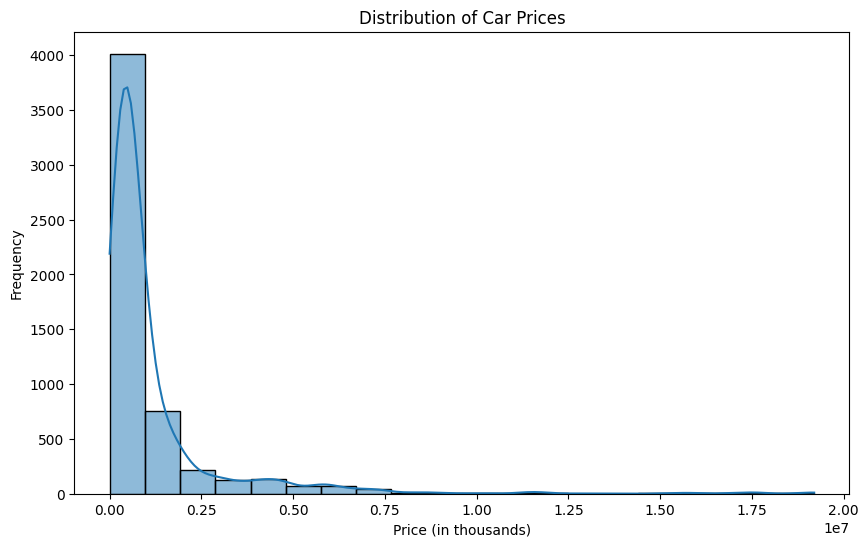

In [ ]:
# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

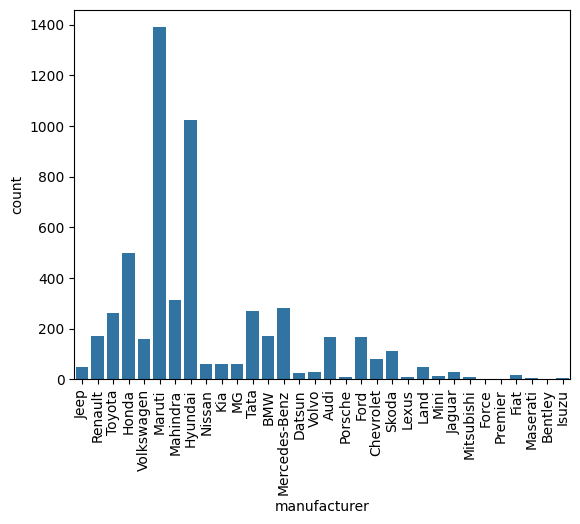

In [ ]:
# car count based on manufacturer
ax = sns.countplot(data=df, x=df['manufacturer'])
ax.tick_params(axis='x', rotation=90)

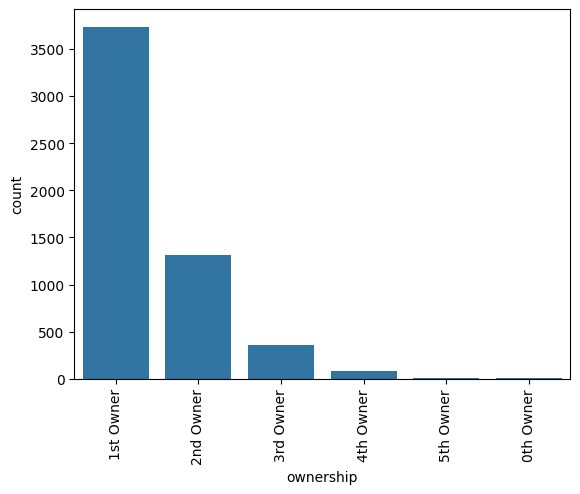

In [ ]:
# car count based on ownership
ax = sns.countplot(data=df, x=df['ownership'])
ax.tick_params(axis='x', rotation=90)

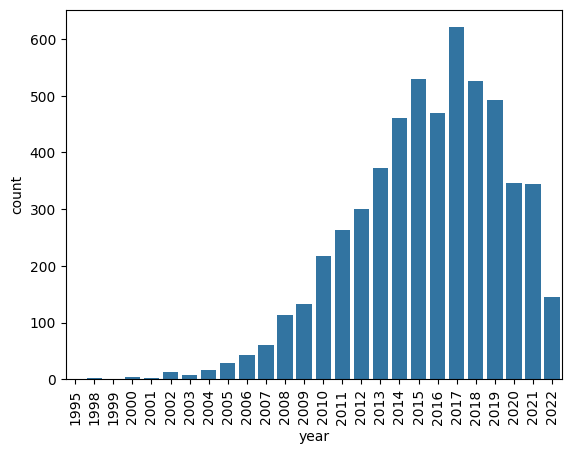

In [ ]:
# car count based on year
ax = sns.countplot(data=df, x=df['year'])
ax.tick_params(axis='x', rotation=90)

In [ ]:
df['fuel_type'].value_counts()

Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: fuel_type, dtype: int64

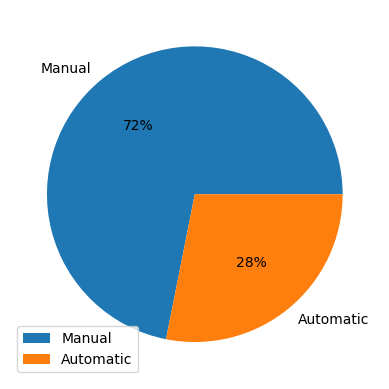

In [ ]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(df['transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

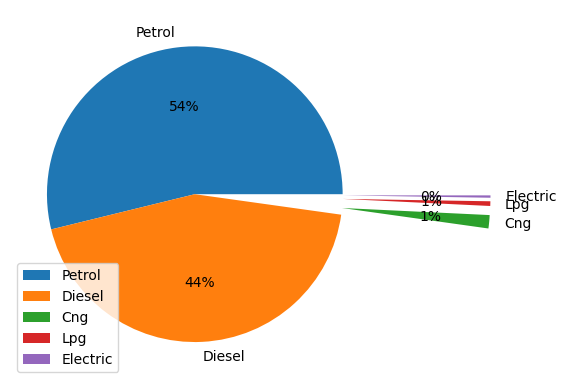

In [ ]:
# distribution of cars by fuel type
labels = ['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric']
plt.pie(df['fuel_type'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()

<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

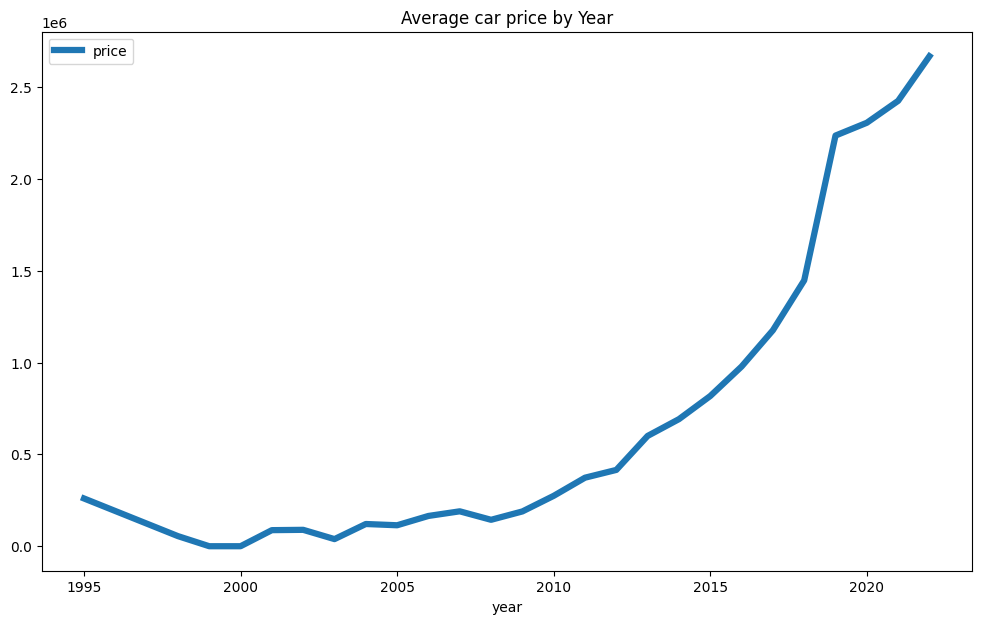

In [ ]:
vis_1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean')
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by kilometers driven'}, xlabel='kms_driven'>

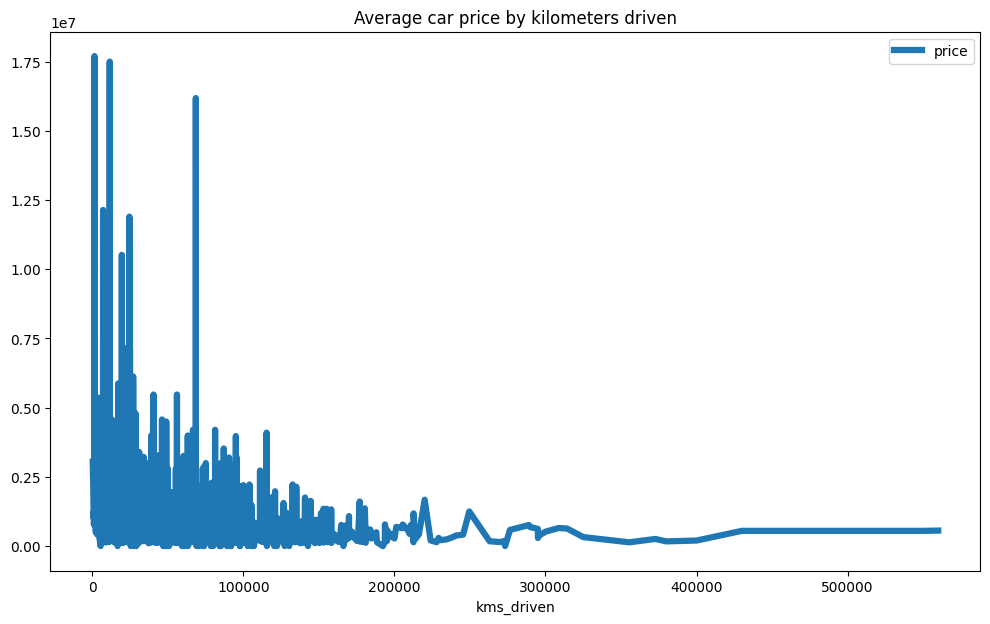

In [ ]:
vis_2=pd.pivot_table(df, index=['kms_driven'],values = ['price'],aggfunc = 'mean')
vis_2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by kilometers driven')

<Axes: title={'center': 'Average car price by number of owners'}, xlabel='ownership'>

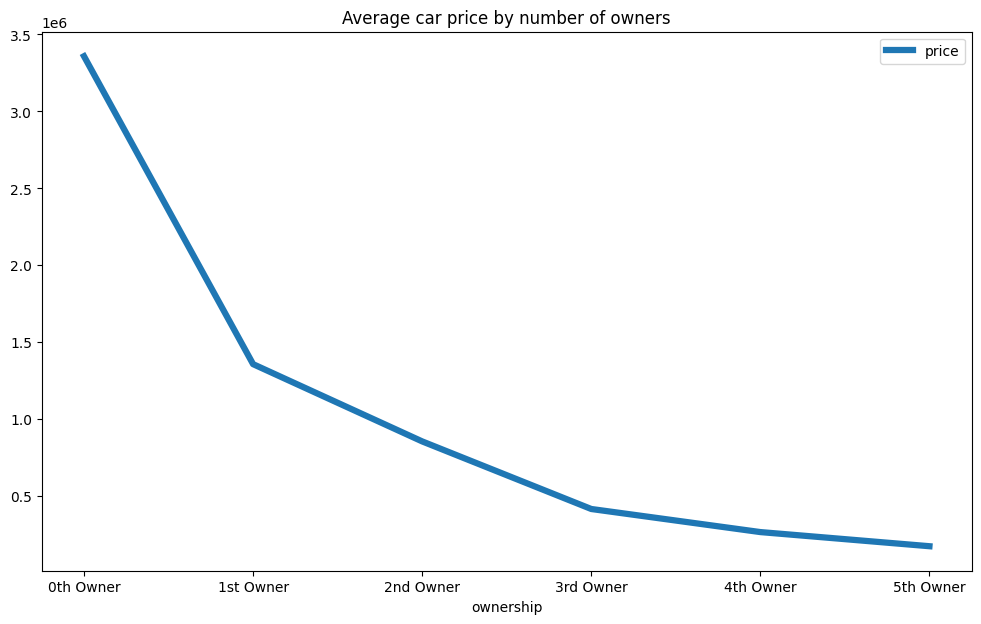

In [ ]:
vis_3=pd.pivot_table(df, index=['ownership'],values = ['price'],aggfunc = 'mean')
vis_3.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by number of owners')

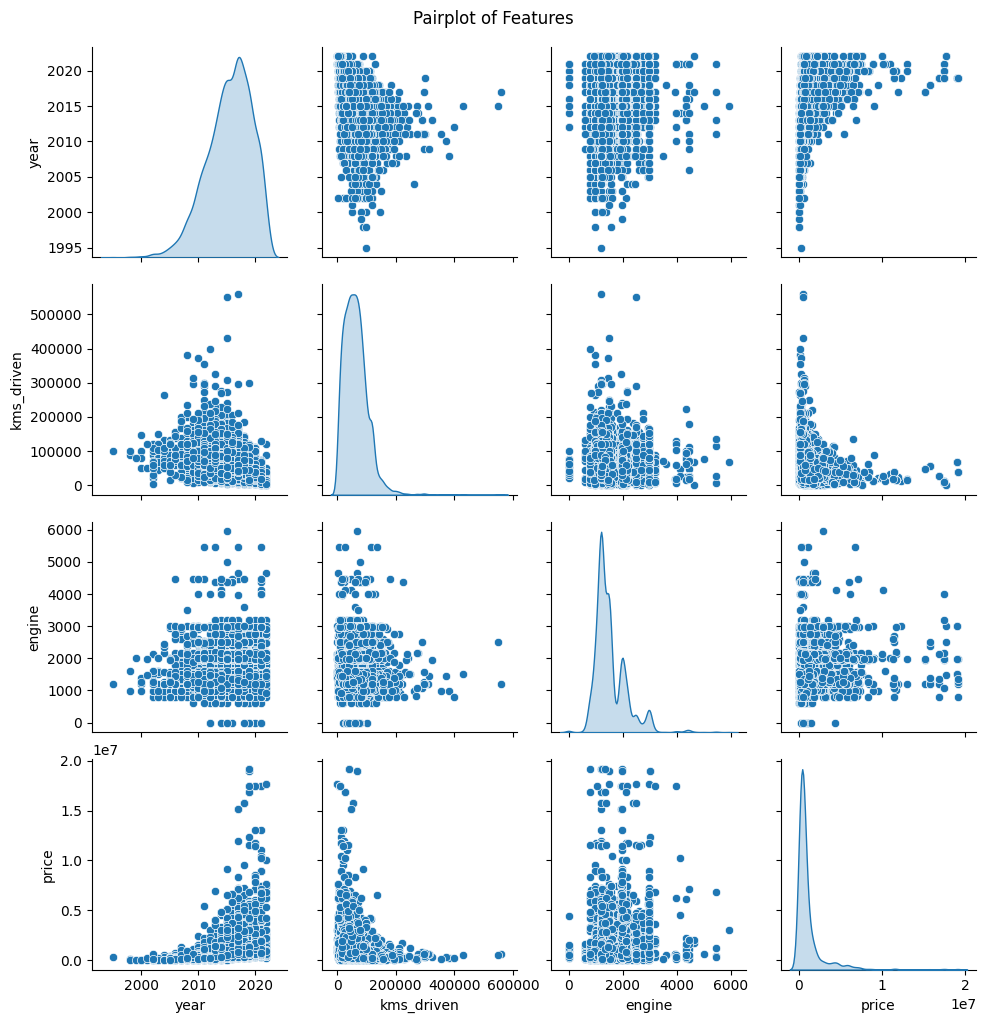

In [ ]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

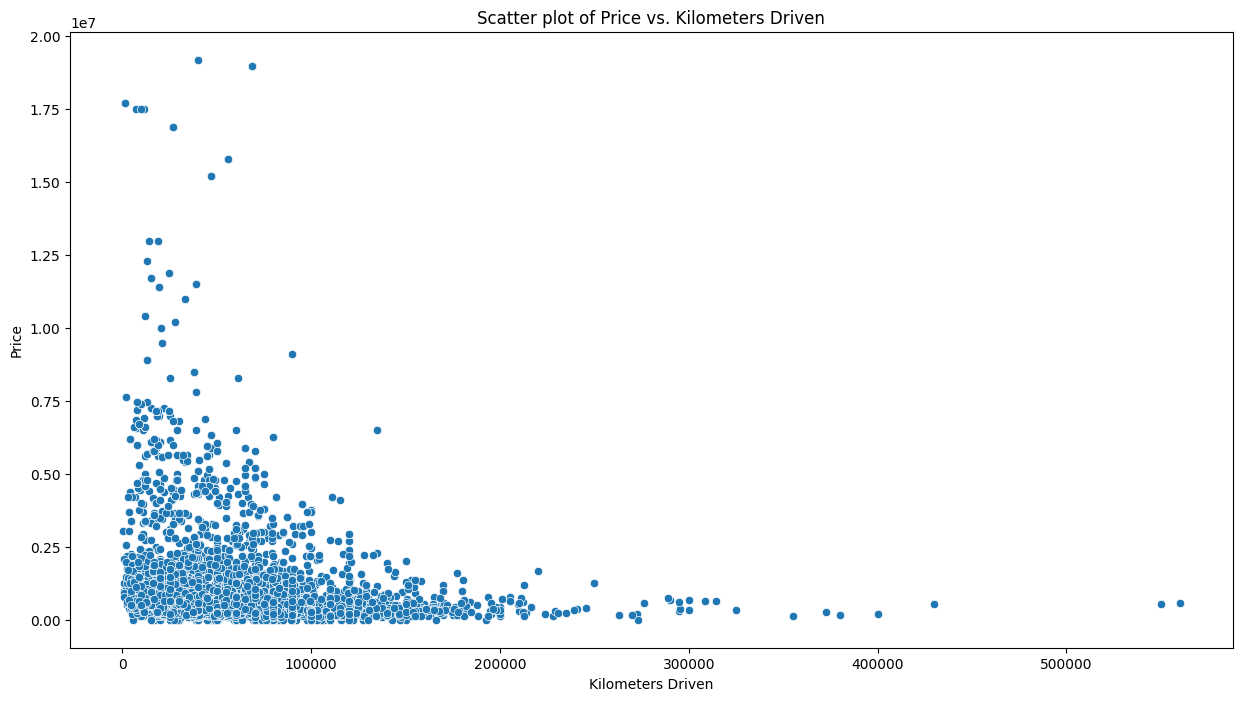

In [ ]:
# Scatter plots of price vs. numerical features
plt.figure(figsize=(15, 8))
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.title('Scatter plot of Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

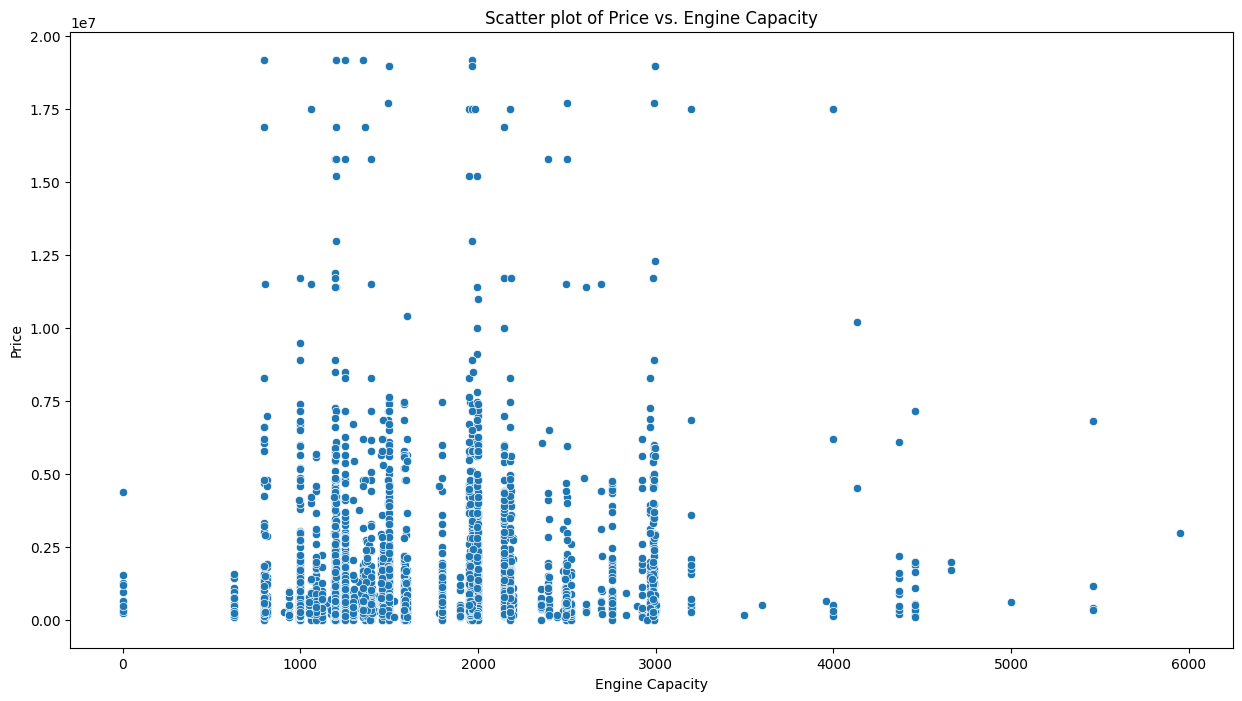

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='engine', y='price', data=df)
plt.title('Scatter plot of Price vs. Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Price')
plt.show()

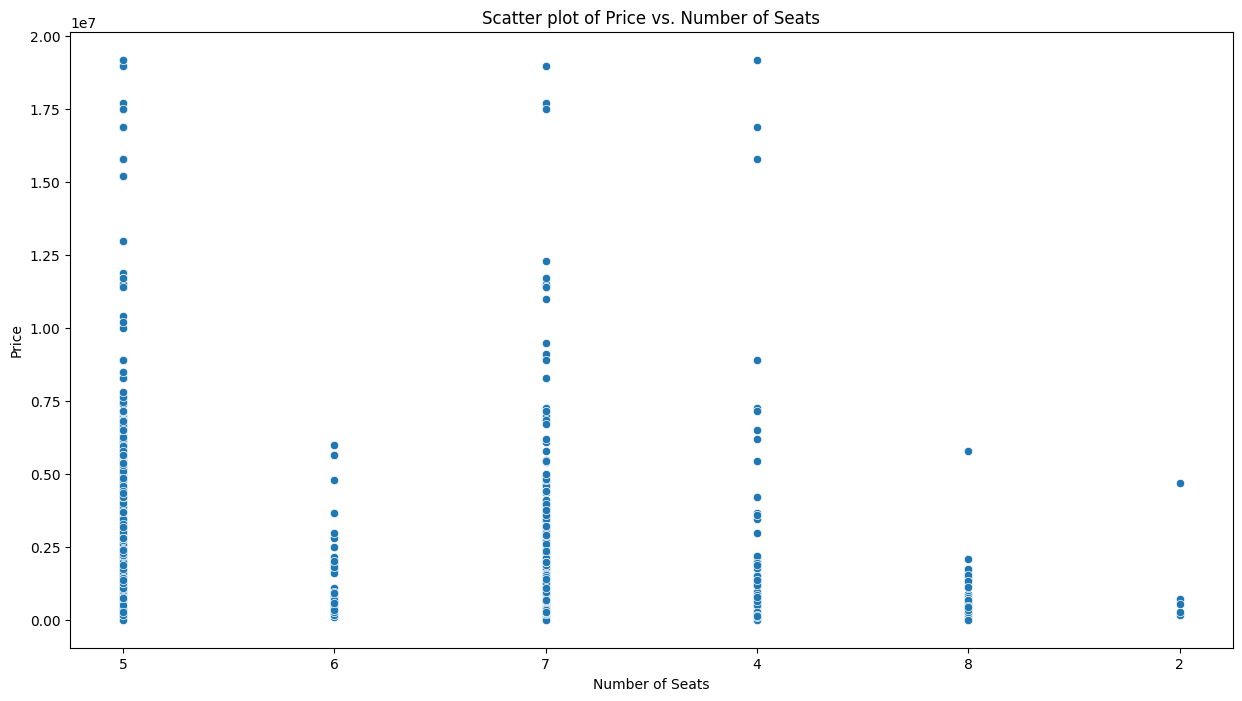

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Seats', y='price', data=df)
plt.title('Scatter plot of Price vs. Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Price')
plt.show()

<ipython-input-43-500ad8719de1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


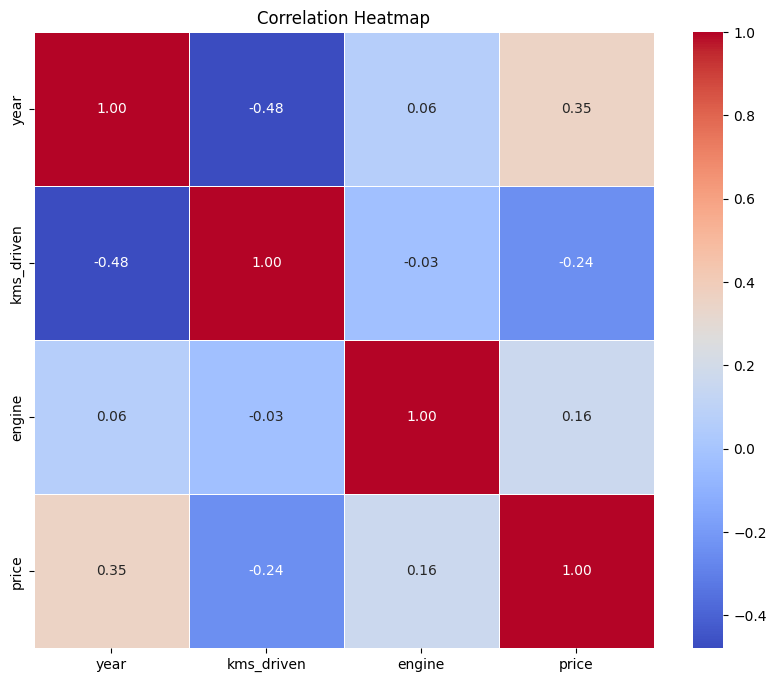

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,Jeep,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,1003000.0
1,Renault,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,1283000.0
2,Toyota,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,1640000.0
3,Honda,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,777000.0
4,Volkswagen,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,515000.0


Encoding the data

In [ ]:
labelencoder = LabelEncoder()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  5512 non-null   object 
 1   model         5512 non-null   object 
 2   year          5512 non-null   int64  
 3   kms_driven    5512 non-null   int64  
 4   engine        5512 non-null   int64  
 5   fuel_type     5512 non-null   object 
 6   transmission  5512 non-null   object 
 7   Seats         5512 non-null   object 
 8   ownership     5512 non-null   object 
 9   price         5512 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [ ]:
# encoding the car's manufacturer with label encoder
df['manufacturer'] = labelencoder.fit_transform(df['manufacturer'])

# encoding the car's model with label encoder
df['model'] = labelencoder.fit_transform(df['model'])

# encoding the car's fuel type with label encoder
df['fuel_type'] = labelencoder.fit_transform(df['fuel_type'])

# encoding the car's transmission with label encoder
df['transmission'] = labelencoder.fit_transform(df['transmission'])

# encoding the number of seats with label encoder
df['Seats'] = labelencoder.fit_transform(df['Seats'])

# encoding the number of owners with label encoder
df['ownership'] = labelencoder.fit_transform(df['ownership'])

In [ ]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,12,47,2017,86226,1956,1,1,2,1,1003000.0
1,26,54,2021,13248,1330,4,0,2,1,1283000.0
2,29,39,2016,60343,2494,4,0,2,1,1640000.0
3,8,99,2018,26696,1199,4,0,2,1,777000.0
4,30,138,2016,69414,1199,4,1,2,1,515000.0


In [ ]:
# Preprocessing pipeline for numerical features
numeric_features = ['year', 'kms_driven', 'engine', 'Seats']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])



In [ ]:
# Preprocessing pipeline for categorical features
categorical_features = ['manufacturer', 'model', 'fuel_type', 'transmission', 'ownership']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])



In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Splitting the data

In [ ]:
# splitting into feature and label
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X.head(), X.shape

(   manufacturer  model  year  kms_driven  engine  fuel_type  transmission  \
 0            12     47  2017       86226    1956          1             1   
 1            26     54  2021       13248    1330          4             0   
 2            29     39  2016       60343    2494          4             0   
 3             8     99  2018       26696    1199          4             0   
 4            30    138  2016       69414    1199          4             1   
 
    Seats  ownership  
 0      2          1  
 1      2          1  
 2      2          1  
 3      2          1  
 4      2          1  ,
 (5512, 9))

In [ ]:
y.head(), y.shape

(0    1003000.0
 1    1283000.0
 2    1640000.0
 3     777000.0
 4     515000.0
 Name: price, dtype: float64,
 (5512,))

In [ ]:
# splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4409, 9), (1103, 9), (4409,), (1103,))

Model building and training

In [ ]:
# Decesion Tree
# Define model pipeline
model_pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_pipeline_dt.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_dt)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_dt)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_dt)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('RMSE:',RMSE)


r2 score: 0.950944571216415
MAE: 167293.74433363555
MSE: 197701514959.20218
RMSE: 444636.38510495535


In [ ]:
# Define linear regression model pipeline
model_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_pipeline_lr.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_lr)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_lr)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_lr)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_lr))
print('RMSE:',RMSE)

r2 score: 0.8391223191868524
MAE: 359514.39065768284
MSE: 648363738908.4468
RMSE: 805210.3693498034


In [ ]:
#Random Forest
# Define model pipeline
model_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_pipeline_rf.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_rf)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_rf)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_rf)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE:',RMSE)

r2 score: 0.9302002216074443
MAE: 176527.24236929585
MSE: 281304684806.7189
RMSE: 530381.6407142302


In [ ]:
#KNN
# Define model pipeline
model_pipeline_kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Same train-test split as before

# Train the model
model_pipeline_kn.fit(X_train, y_train)

# Make predictions
y_pred_kn = model_pipeline_kn.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_kn)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_kn)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_kn)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_kn))
print('RMSE:',RMSE)

r2 score: 0.6958223771212664
MAE: 330965.5485040798
MSE: 1225886274995.4668
RMSE: 1107197.4868990025


In [ ]:
#SVM
# Define model pipeline
model_pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])

# Same train-test split as before

# Train the model
model_pipeline_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_pipeline_svm.predict(X_test)

In [ ]:
# Evaluate the model

r2=r2_score(y_test, y_pred_svm)
print("r2 score:",r2)
MAE=mean_absolute_error(y_test, y_pred_svm)
print('MAE:',MAE)
MSE=mean_squared_error(y_test, y_pred_svm)
print('MSE:',MSE)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred_svm))
print('RMSE:',RMSE)

r2 score: -0.09786506119423843
MAE: 866829.7726464088
MSE: 4424578302565.104
RMSE: 2103468.160577931


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor()

# Define model pipeline
model_pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gradient_boosting_model)
])

# Train the model on the entire training dataset
model_pipeline_gb.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_gb = model_pipeline_gb.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Print evaluation metrics
print("Evaluation Metrics for Gradient Boosting Regressor:")
print(f"R² Score: {r2_gb:.4f}")
print(f"Mean Absolute Error: {mae_gb:.4f}")
print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"Root Mean Squared Error: {rmse_gb:.4f}")


Evaluation Metrics for Gradient Boosting Regressor:
R² Score: 0.8803
Mean Absolute Error: 347924.0339
Mean Squared Error: 482400185335.5518
Root Mean Squared Error: 694550.3476


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Define the AdaBoost Regressor model
adaboost_model = AdaBoostRegressor()

# Define model pipeline
model_pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', adaboost_model)
])

# Train the model on the entire training dataset
model_pipeline_adaboost.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_adaboost = model_pipeline_adaboost.predict(X_test)

# Evaluate the model
r2_adaboost = r2_score(y_test, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)

# Print evaluation metrics
print("Evaluation Metrics for AdaBoost Regressor:")
print(f"R² Score: {r2_adaboost:.4f}")
print(f"Mean Absolute Error: {mae_adaboost:.4f}")
print(f"Mean Squared Error: {mse_adaboost:.4f}")
print(f"Root Mean Squared Error: {rmse_adaboost:.4f}")


Evaluation Metrics for AdaBoost Regressor:
R² Score: 0.3132
Mean Absolute Error: 773561.8823
Mean Squared Error: 2767797056255.5420
Root Mean Squared Error: 1663669.7558


In [ ]:
from xgboost import XGBRegressor

# Define the XGBoost Regressor model
xgboost_model = XGBRegressor()

# Define model pipeline
model_pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgboost_model)
])

# Train the model on the entire training dataset
model_pipeline_xgboost.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_xgboost = model_pipeline_xgboost.predict(X_test)

# Evaluate the model
r2_xgboost = r2_score(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

# Print evaluation metrics
print("Evaluation Metrics for XGBoost Regressor:")
print(f"R² Score: {r2_xgboost:.4f}")
print(f"Mean Absolute Error: {mae_xgboost:.4f}")
print(f"Mean Squared Error: {mse_xgboost:.4f}")
print(f"Root Mean Squared Error: {rmse_xgboost:.4f}")


Evaluation Metrics for XGBoost Regressor:
R² Score: 0.9547
Mean Absolute Error: 172216.0692
Mean Squared Error: 182688267518.6778
Root Mean Squared Error: 427420.4809


In [ ]:

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),

}

# Cross-validation to find MSE
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Perform cross-validation with MSE as the scoring metric
    mse_scores = -cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

    # Print mean MSE and standard deviation of MSE
    print(f"{name} MSE: {mse_scores.mean():.4f} (± {mse_scores.std():.4f})")

Linear Regression MSE: 766871334155.3525 (± 119253174664.7925)
Decision Tree MSE: 265394026335.6989 (± 117954769563.9284)
Random Forest MSE: 197083953874.9630 (± 95873602507.1888)
kNN MSE: 1117150872018.2573 (± 156244996154.8651)
SVR MSE: 4265189483262.5674 (± 247305341317.0595)
Gradient Boosting MSE: 477330497284.2625 (± 71360503529.8238)
AdaBoost MSE: 3305206480509.4800 (± 1201199648953.7717)
XGBoost MSE: 203697758986.7471 (± 127941971724.1770)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'kNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
}

# Evaluate each model and store the results
results = {}
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model on the entire training dataset
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store evaluation metrics
    results[name] = {'R² Score': r2, 'Mean Absolute Error': mae,
                     'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results
print("Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Evaluation Results:

Linear Regression:
R² Score: 0.8391
Mean Absolute Error: 359514.3907
Mean Squared Error: 648363738908.4468
Root Mean Squared Error: 805210.3693

Decision Tree:
R² Score: 0.9540
Mean Absolute Error: 166051.6772
Mean Squared Error: 185277252039.8912
Root Mean Squared Error: 430438.4416

Random Forest:
R² Score: 0.9330
Mean Absolute Error: 175923.7236
Mean Squared Error: 270208183130.6627
Root Mean Squared Error: 519815.5280

kNN:
R² Score: 0.6958
Mean Absolute Error: 330965.5485
Mean Squared Error: 1225886274995.4668
Root Mean Squared Error: 1107197.4869

SVR:
R² Score: -0.0995
Mean Absolute Error: 869232.9138
Mean Squared Error: 4431213682353.2617
Root Mean Squared Error: 2105044.8172

Gradient Boosting:
R² Score: 0.8808
Mean Absolute Error: 347692.3127
Mean Squared Error: 480248562310.0679
Root Mean Squared Error: 692999.6842

AdaBoost:
R² Score: 0.1762
Mean Absolute Error: 979715.5516
Mean Squared Error: 3320121269508.2720
Root Mean Squared Error: 1822119.9932

XG

In [ ]:

# Dictionary to store R² scores for each model
r2_scores = {}

# Cross-validation to find R² score for each model
for name, model in models.items():
    # Define model pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Perform cross-validation with R² score as the scoring metric
    r2 = cross_val_score(model_pipeline, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

    # Store mean R² score
    r2_scores[name] = r2.mean()

# Print R² scores for each model
for name, r2 in r2_scores.items():
    print(f"R² score for {name}: {r2:.4f}")

R² score for Linear Regression: 0.8004
R² score for Decision Tree: 0.9334
R² score for Random Forest: 0.9478
R² score for kNN: 0.7100
R² score for SVR: -0.1096
R² score for Gradient Boosting: 0.8758
R² score for AdaBoost: 0.1828
R² score for XGBoost: 0.9466


In [ ]:
# Assuming you have new input data in the form of a dictionary
new_data = {
    'manufacturer': 'Honda',
    'model': 'City',
    'year': 2018,
    'kms_driven': 40000,
    'engine': 100,
    'fuel_type': 'Petrol',
    'transmission': 'Manual',
    'Seats': 5,
    'ownership': 'First'
}

# Convert the input data into a DataFrame
import pandas as pd

new_data_df = pd.DataFrame([new_data])

# Make predictions using the loaded model
predicted_price =model_pipeline_xgboost.predict(new_data_df)

# Print the predicted price
print("Predicted price for the car:", predicted_price)


Predicted price for the car: [512756.78]


In [ ]:

# Assuming you have new input data in the form of a dictionary
new_data = {
    'manufacturer': 'Toyota',
    'model': 'Corolla',
    'year': 2015,
    'kms_driven': 60000,
    'engine': 1800,
    'fuel_type': 'Petrol',
    'transmission': 'Automatic',
    'Seats': 5,
    'ownership': 'Third'
}

# Convert the input data into a DataFrame
import pandas as pd

new_data_df = pd.DataFrame([new_data])

# Make predictions using the loaded model
predicted_price = model_pipeline_xgboost.predict(new_data_df)

# Print the predicted price
print("Predicted price for the car:", predicted_price)

Predicted price for the car: [391471.88]


In [ ]:

# Assuming you have new input data in the form of a dictionary
new_data = {
    'manufacturer': 'Hyundai',
    'model': 'i20',
    'year': 2016,
    'kms_driven': 50000,
    'engine': 1200,
    'fuel_type': 'Petrol',
    'transmission': 'Manual',
    'Seats': 5,
    'ownership': 'Second'
}

# Convert the input data into a DataFrame
import pandas as pd

new_data_df = pd.DataFrame([new_data])

# Make predictions using the loaded model
predicted_price = model_pipeline_xgboost.predict(new_data_df)

# Print the predicted price
print("Predicted price for the car:", predicted_price)

Predicted price for the car: [414401.62]


In [ ]:

# Assuming you have new input data in the form of a dictionary
new_data = {
    'manufacturer': 'Suzuki',
    'model': 'Swift',
    'year': 2010,
    'kms_driven': 90000,
    'engine': 1200,
    'fuel_type': 'Petrol',
    'transmission': 'Manual',
    'Seats': 4,
    'ownership': 'Fourth'
}

# Convert the input data into a DataFrame
import pandas as pd

new_data_df = pd.DataFrame([new_data])

# Make predictions using the loaded pipeline
predicted_price = model_pipeline_xgboost.predict(new_data_df)

# Print the predicted price
print("Predicted price for the car:", predicted_price)

Predicted price for the car: [175726.5]
